# Projet notebook

## 1. choisir un thème en groupe (medecine, sport, musique, …)
## 2. trouver un dataset au format csv dans kaggle sur le thème choisi
   
   https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

In [1]:
import pandas as pd
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016pluspropre.csv", sep=",")

Context
Motivated by Gregory Smith's web scrape of VGChartz Video Games Sales, this data set simply extends the number of variables with another web scrape from Metacritic. Unfortunately, there are missing observations as Metacritic only covers a subset of the platforms. Also, a game may not have all the observations of the additional variables discussed below. Complete cases are ~ 6,900

Content
Alongside the fields: Name, Platform, YearofRelease, Genre, Publisher, NASales, EUSales, JPSales, OtherSales, Global_Sales, we have:-

Critic_score - Aggregate score compiled by Metacritic staff
Criticcount - The number of critics used in coming up with the Criticscore
User_score - Score by Metacritic's subscribers
Usercount - Number of users who gave the userscore
Developer - Party responsible for creating the game
Rating - The ESRB ratings
Acknowledgements
This repository, https://github.com/wtamu-cisresearch/scraper, after a few adjustments worked extremely well!


In [2]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Guitar Hero III: Legends of Rock,PS2,2007,Misc,Activision,3.49,0.01,0.01,1.48,4.98,82.0,24.0,8.2,46,"Neversoft Entertainment, BudCat",T
1,Link's Crossbow Training,Wii,2007,Shooter,Nintendo,3.05,1.17,0.29,0.46,4.98,68.0,34.0,7.1,47,Nintendo,T
2,Fallout 3,X360,2008,Role-Playing,Bethesda Softworks,3.40,0.99,0.09,0.45,4.93,93.0,84.0,8.5,1655,Bethesda Game Studios,M
3,Uncharted: Drake's Fortune,PS3,2007,Action,Sony Computer Entertainment,2.31,1.72,0.12,0.77,4.92,88.0,66.0,8.1,2306,"Naughty Dog, SCE/WWS",T
4,Madden NFL 06,PS2,2005,Sports,Electronic Arts,3.98,0.26,0.01,0.66,4.91,88.0,29.0,8.0,121,EA Sports,E


In [59]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,7237.000000,7237.000000,7237.000000,7237.000000,7237.000000,7237.000000,6683.000000,6683.00000,7237.000000,7237.000000
mean,2007.644466,0.300069,0.168005,0.040285,0.060481,0.569027,69.921592,28.35089,7.116747,140.295426
std,4.261398,0.432908,0.289884,0.138292,0.119429,0.771626,13.750889,18.63278,1.500946,491.301814
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.00000,0.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.00000,6.400000,10.000000
50%,2007.000000,0.140000,0.050000,0.000000,0.020000,0.270000,72.000000,24.00000,7.500000,24.000000
75%,2011.000000,0.360000,0.190000,0.010000,0.060000,0.680000,80.000000,39.00000,8.200000,75.000000
max,2016.000000,4.180000,3.020000,2.620000,2.930000,4.980000,98.000000,107.00000,9.700000,10665.000000


## 3. trouver une colonne à prédire
## 4. indiquer une colonne qui pourrait d’après vos connaissances sur le dataset  choisi être un bon prédicteur pour la colonne à prédire
## 5.plotter un catplot de ces 2 colonnes (ou tout autre visu qui pourrait confirmer ou infirmer le choix précédent)

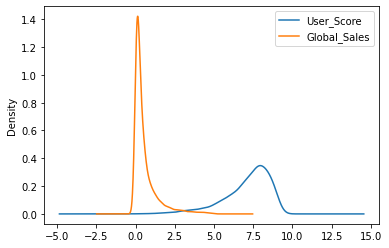

In [3]:
df[['User_Score','Global_Sales']].plot(kind='kde');

## 6. utiliser le TP intro stats pour trouver le meilleur predicteur (ici une fonction lineaire y = ax + b), selon la methode des moindres carrés

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

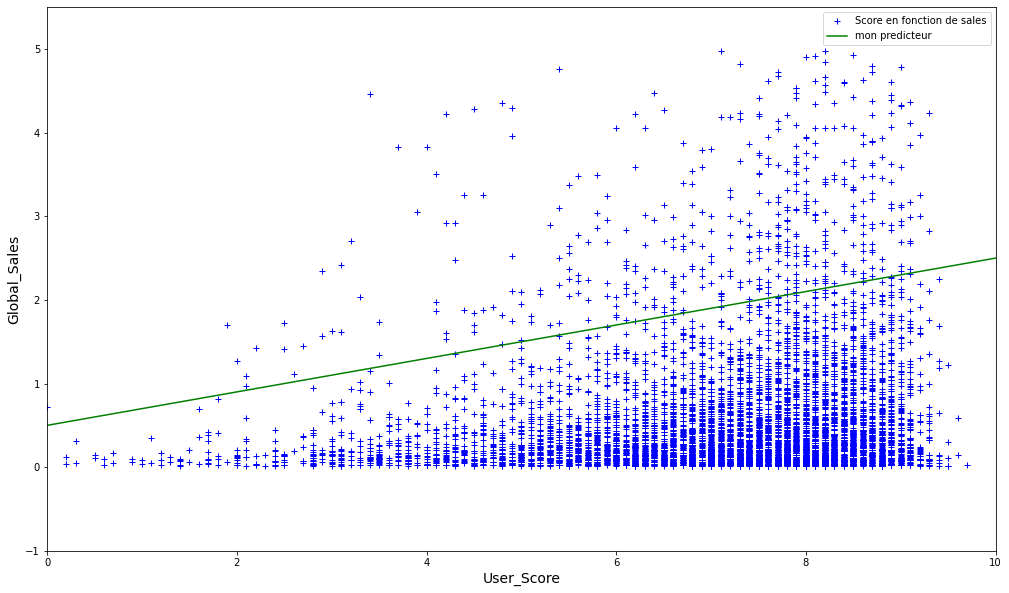

In [21]:
def pred_a(x):
    a=0.2
    b=0.5
    f=[]
    for elem in x:
        f.append(a*elem+b)
    return f

xl=[0,10]

fig = plt.figure(figsize=(17,10))
plt.plot(df['User_Score'],df['Global_Sales'],'+',c='blue',label='Score en fonction de sales')
plt.plot(xl,pred_a(xl),c='green',label='mon predicteur')
plt.xlabel('User_Score', fontsize=14)
plt.ylabel('Global_Sales', fontsize=14)
plt.xlim([0,10])
plt.ylim([-1,5.5])
plt.legend()
plt.show()

In [10]:
#calc a
x=df['User_Score']
y=df['Global_Sales']

un=len(x)*(df['User_Score']*df['Global_Sales']).sum()

sumx=df['User_Score'].sum()
sumy=df['Global_Sales'].sum()

deux=len(df['User_Score'])*((df['User_Score']*df['User_Score']).sum())

trois=sumx*sumx

a=(un-(sumx*sumy))/(deux-trois)
a

0.06999125142311795

In [11]:
# Puis calcul du b
quatre=sumy*((df['User_Score']*df['User_Score']).sum())
cinq=sumx*(df['User_Score']*df['Global_Sales']).sum()
six=len(df['User_Score'])*((df['User_Score']*df['User_Score']).sum())
sept=sumx*sumx

b=(quatre-cinq)/(six-sept)
b

0.07091717366710866

In [15]:
a=0.06999125142311795
b=0.07091717366710866

def pred(x,a,b):
    return a*x+b

pred(5,a,b)

0.4208734307826984

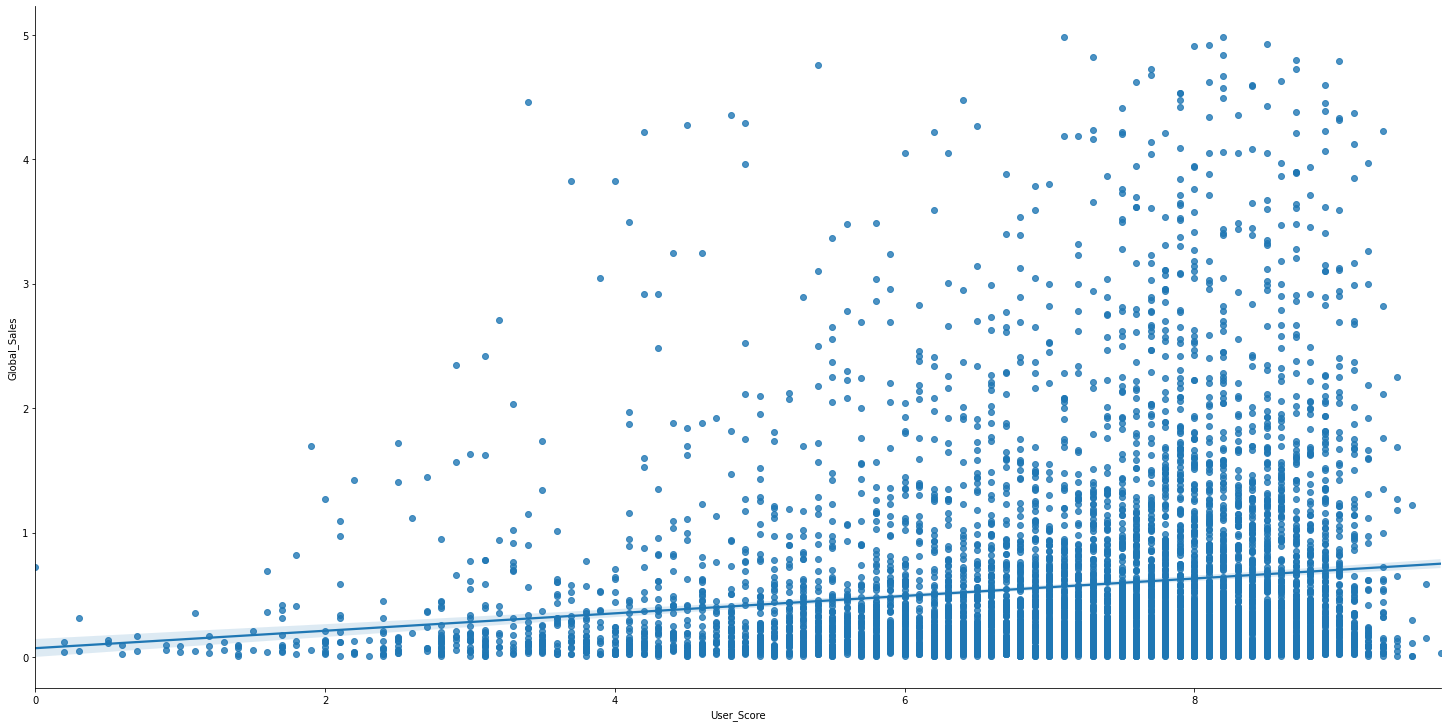

In [23]:
sns.lmplot(x='User_Score', y='Global_Sales', data=df,height=10, aspect=2)

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(df[['Global_Sales']], df.User_Score)
reg.predict(np.array([[8]]))

array([9.0846598])

## 7. evaluer la qualité du predicteur en calculant son RMSE (Root Mean Squared Error)

In [25]:
import math

est_p=[pred(i,a,b) for i in x]
est_pa=pred_a(x) 

print("RMSE du meilleur predicteur selon moindre carré",math.sqrt(((pd.Series(est_p)-df['Global_Sales'])**2).sum()/len(df)))
print("RMSE du predicteur identifié analytiquement", math.sqrt(((pd.Series(est_pa)-df['Global_Sales'])**2).sum()/len(df)))

RMSE du meilleur predicteur selon moindre carré 0.7643887521997268
RMSE du predicteur identifié analytiquement 1.5673390616404552


In [27]:
def rmse(data_x,data_y):
    i = 0
    res = 0
    
    for i in range(len(data_x)):
              
        res += ((nouv_pred(data_x[i])-data_y[i])**2)/len(data_x)
    
    return math.sqrt(res)


def nouv_pred(x):
    a=0.06999125142311795
    b=0.07091717366710866
    return a*x+b
nouv_pred(x)
rmse(df['User_Score'],df['Global_Sales'])

0.7643887521997313

Plus la valeur des critères RMSE ou MSE est proche de zéro, meilleur est le modèle évalué en
terme d’exactitude. 

# QQs visualisation

In [28]:
dx1=df.groupby("Genre").median().sort_values('Global_Sales',ascending=False)
dx2=df.groupby("Genre").median().sort_values('User_Score',ascending=False)
dy1=df.groupby("Genre").mean().sort_values('Global_Sales',ascending=False)
dy2=df.groupby("Genre").mean().sort_values('User_Score',ascending=False)

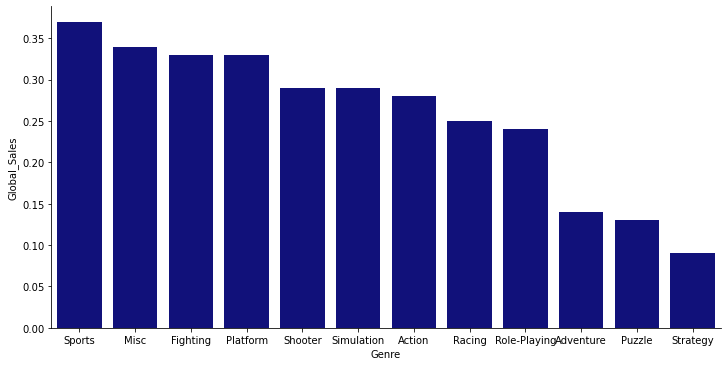

In [29]:
fig11 = sns.catplot(x=dx1.index, y="Global_Sales",color='darkblue', data=dx1, kind='bar',height=5, aspect=2)

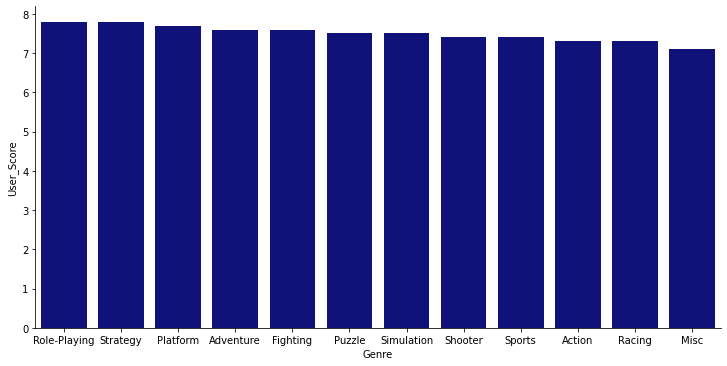

In [30]:
fig11 = sns.catplot(x=dx2.index, y="User_Score", color='darkblue',data=dx2, kind='bar',height=5, aspect=2)


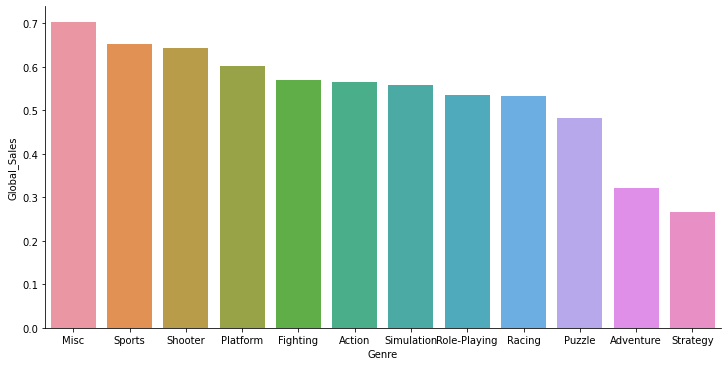

In [31]:
fig12 = sns.catplot(x=dy1.index, y="Global_Sales", data=dy1, kind='bar',height=5, aspect=2)


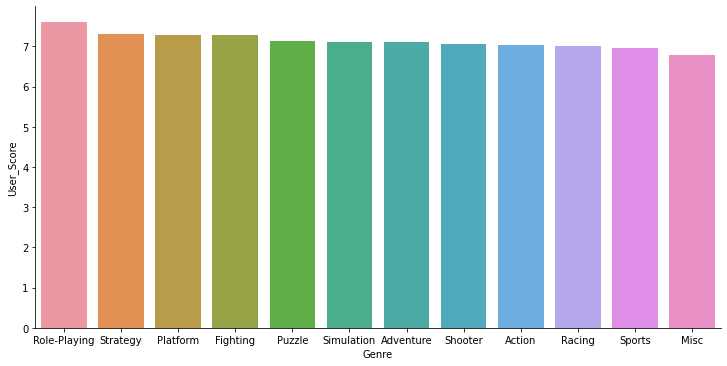

In [69]:
fig21 = sns.catplot(x=dy2.index, y="User_Score", data=dy2, kind='bar',height=5, aspect=2)

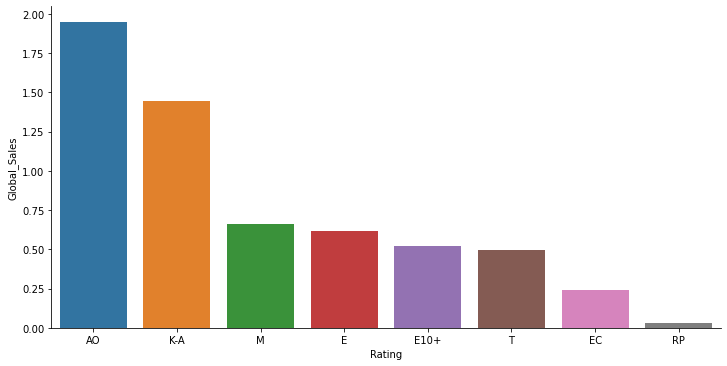

In [32]:
dr=df.groupby("Rating").mean().sort_values('Global_Sales',ascending=False)
fig11 = sns.catplot(x=dr.index, y="Global_Sales", data=dr, kind='bar',height=5, aspect=2)

AO- Adults Only (Adultes uniquement à partir de 18 ans)/Adultes seulement

K-A- Kids to Adults (Des enfants aux parents)- > E

M- Mature (Mature à partir de 17 ans)/Jeunes adultes

E- Everyone (Tout le monde)/Enfants et adultes

E10+- Everyone 10+ (Tout le monde au-dessus de 10 ans)/Enfants et adultes 10+

T- Teen (Adolescents)/Adolescents

EC-Early Childhood (Petite enfance)/Jeunes enfants

RP- Rating Pending (En attente de classement)/Cote en instance

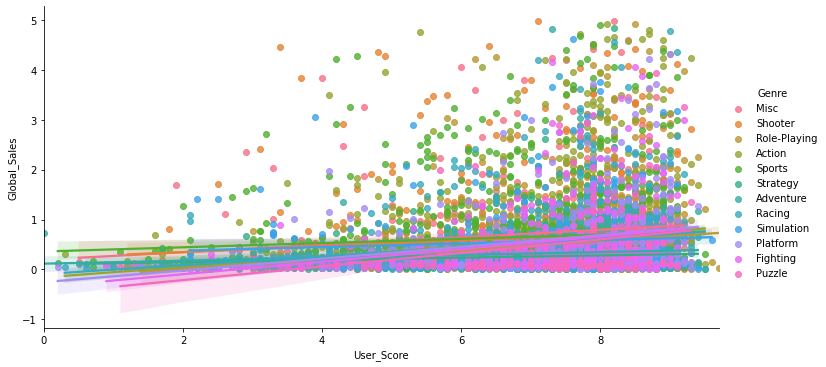

In [43]:
sns.lmplot(x='User_Score', y='Global_Sales', hue='Genre', data=df,height=5, aspect=2)

<AxesSubplot:>

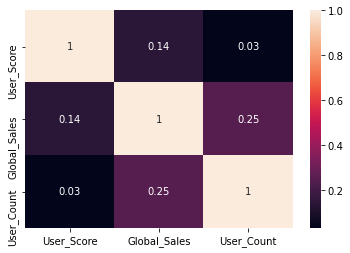

In [44]:
correlation = df[['User_Score','Global_Sales','User_Count']].corr()
sns.heatmap(correlation,
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values,
            annot=True)

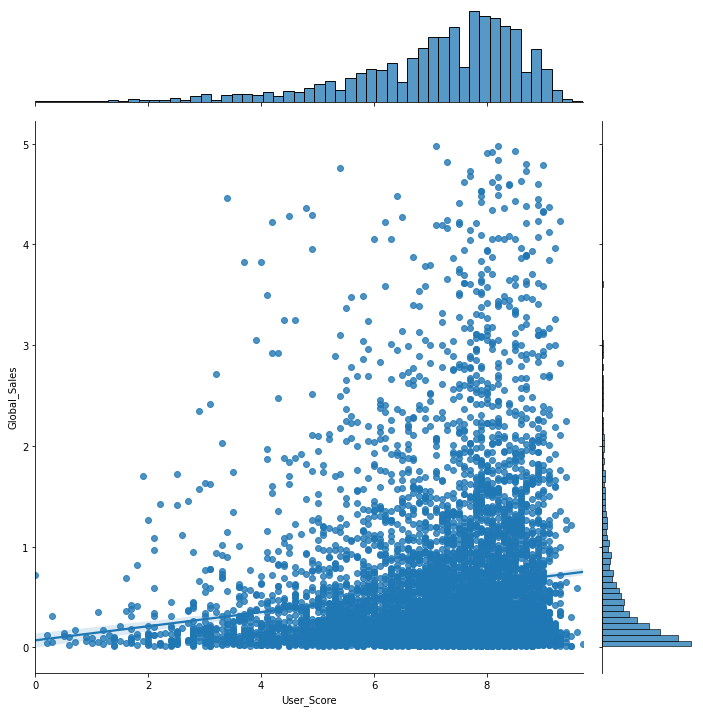

In [41]:
g = sns.JointGrid(x="User_Score", y="Global_Sales", data=df, height=10)
g = g.plot(sns.regplot, sns.histplot)

In [57]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [52]:
dfd = pd.read_csv("cluster.csv", sep=",")

In [46]:
dfd

,ID,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,7162,2001,0.01,0.00,0.00,0.00,0.01,46,4,2.4,21
1,2436,2002,0.01,0.00,0.00,0.00,0.01,64,7,8.0,4
2,2430,2002,0.01,0.00,0.00,0.00,0.02,55,15,8.0,5
3,4645,2002,0.01,0.00,0.00,0.00,0.02,89,11,7.0,6
4,18,2002,0.01,0.00,0.00,0.00,0.01,79,5,9.4,9
...,...,...,...,...,...,...,...,...,...,...,...
6678,976,2015,1.54,1.18,1.46,0.26,4.43,81,88,8.5,1184
6679,3684,2006,0.23,0.02,1.49,0.02,1.76,75,30,7.4,27
6680,619,2007,0.37,0.27,1.75,0.18,2.57,72,38,8.7,83
6681,178,2008,0.55,0.50,1.93,0.13,3.11,83,48,9.0,63


In [53]:
sample_df = dfd[(dfd.index % 10) == 0]
sample_df.shape

(669, 11)

[[6.25883194e+03 2.00873480e+03 2.37538737e-01 1.35303933e-01
  1.37544696e-02 4.71215733e-02 4.33814064e-01 5.88170441e+01
  2.30053635e+01 5.15572110e+00 1.49538141e+02]
 [8.78636255e+02 2.00545978e+03 4.02262905e-01 2.06266507e-01
  8.03121248e-02 7.21308523e-02 7.61014406e-01 7.85312125e+01
  3.16884754e+01 8.63835534e+00 2.21882953e+02]
 [4.43280205e+03 2.00816546e+03 2.49530686e-01 1.45258724e-01
  3.21841155e-02 5.48977136e-02 4.82214200e-01 6.81395909e+01
  2.74789410e+01 7.04356197e+00 9.38904934e+01]
 [2.64564699e+03 2.00738044e+03 3.39564699e-01 1.99713775e-01
  4.44841980e-02 6.98628503e-02 6.53923673e-01 7.42456768e+01
  3.12480620e+01 7.86970781e+00 1.33982707e+02]]


IndexError: index 11 is out of bounds for axis 1 with size 11

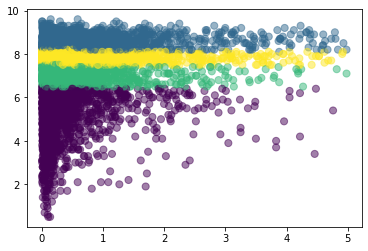

In [54]:
sample_df = DataFrame(dfd,columns=['Global_Sales','User_Score'])
  
kmeans = KMeans(n_clusters=4).fit(dfd)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(sample_df['Global_Sales'], sample_df['User_Score'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 11], centroids[:, 4], c='red', s=10)
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [40.0, 40.0, 72.5, 72.5],
  [10.0, 10.0, 56.25, 56.25],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [150.0, 150.0, 172.5, 172.5],
  [111.25, 111.25, 161.25, 161.25],
  [33.125, 33.125, 136.25, 136.25],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [245.0, 245.0, 255.0, 255.0],
  [222.5, 222.5, 250.0, 250.0],
  [200.0, 200.0, 236.25, 236.25],
  [265.0, 265.0, 275.0, 275.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [270.0, 270.0, 293.75, 293.75],
  [218.125, 218.125, 281.875, 281.875],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 32

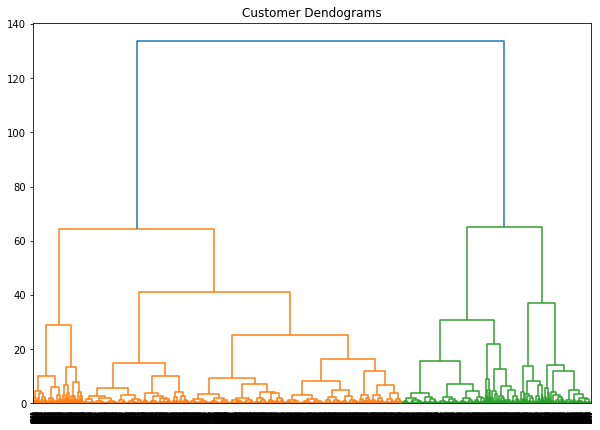

In [58]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(sample_df, method='ward'))
dend

In [74]:
df["Year_of_Release"] = pd.to_numeric(df["Year_of_Release"], downcast="float")
df1 = df[df['Year_of_Release'] > 2010]


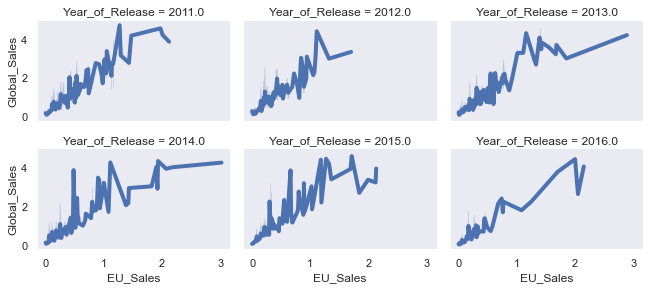

In [75]:
sns.set_theme(style="dark")


# Plot each year's time series in its own facet
g = sns.relplot(
    data=df1,x="EU_Sales",
    y="Global_Sales", col="Year_of_Release", 
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False
)

In [80]:
data_1 = df.groupby("Platform").mean().sort_values('Global_Sales',ascending=False)
data_1[['User_Count', 'Global_Sales']]

,User_Count,Global_Sales
Platform,,
PS,43.035211,0.840141
PS4,458.138655,0.768866
PS3,142.416970,0.744533
XOne,285.218391,0.706322
X360,134.416667,0.699287
PS2,37.254364,0.692161
Wii,36.274621,0.648087
WiiU,204.581633,0.560000
DS,26.703407,0.535531


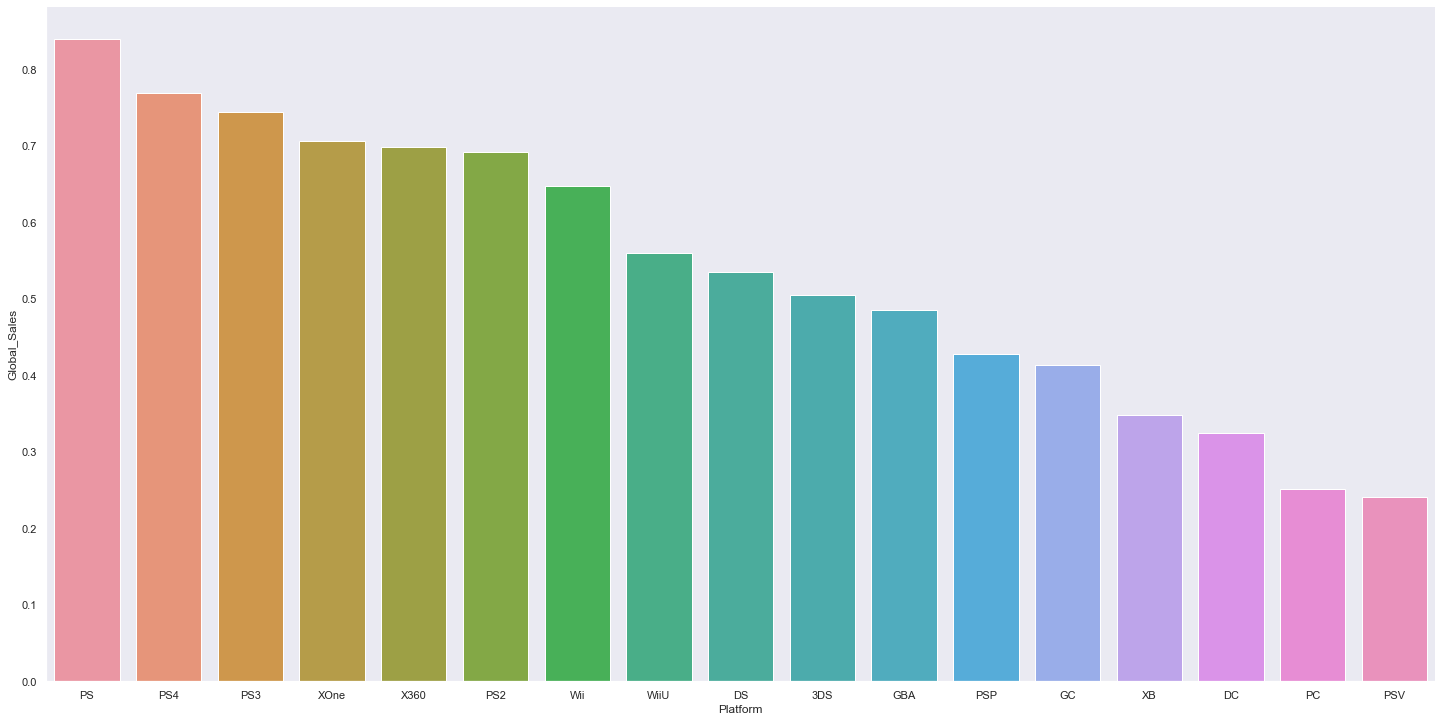

In [81]:
sns.catplot(x=data_1.index, y="Global_Sales", data=data_1, kind='bar',height=10, aspect=2)
plt.show()

Text(0, 0.5, 'Ventes mondiales')

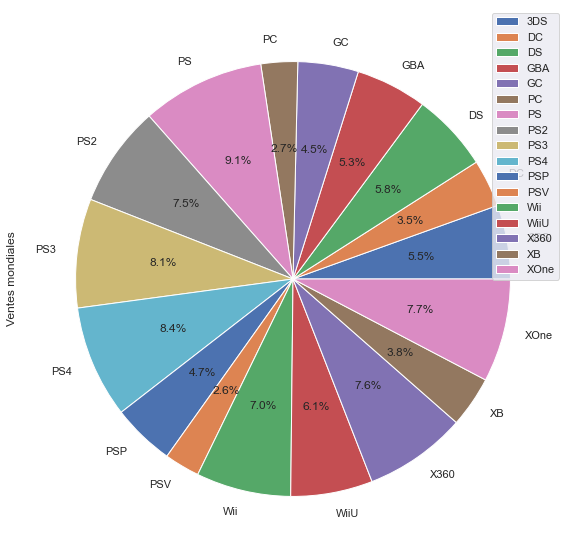

In [82]:
data_pie = df.groupby('Platform')[['Global_Sales']].mean()
data_pie.plot.pie(subplots=True, autopct="%.1f%%", figsize=(10, 10))
plt.ylabel('Ventes mondiales')

Text(8.959999999999994, 0.5, 'Ventes mondiales')

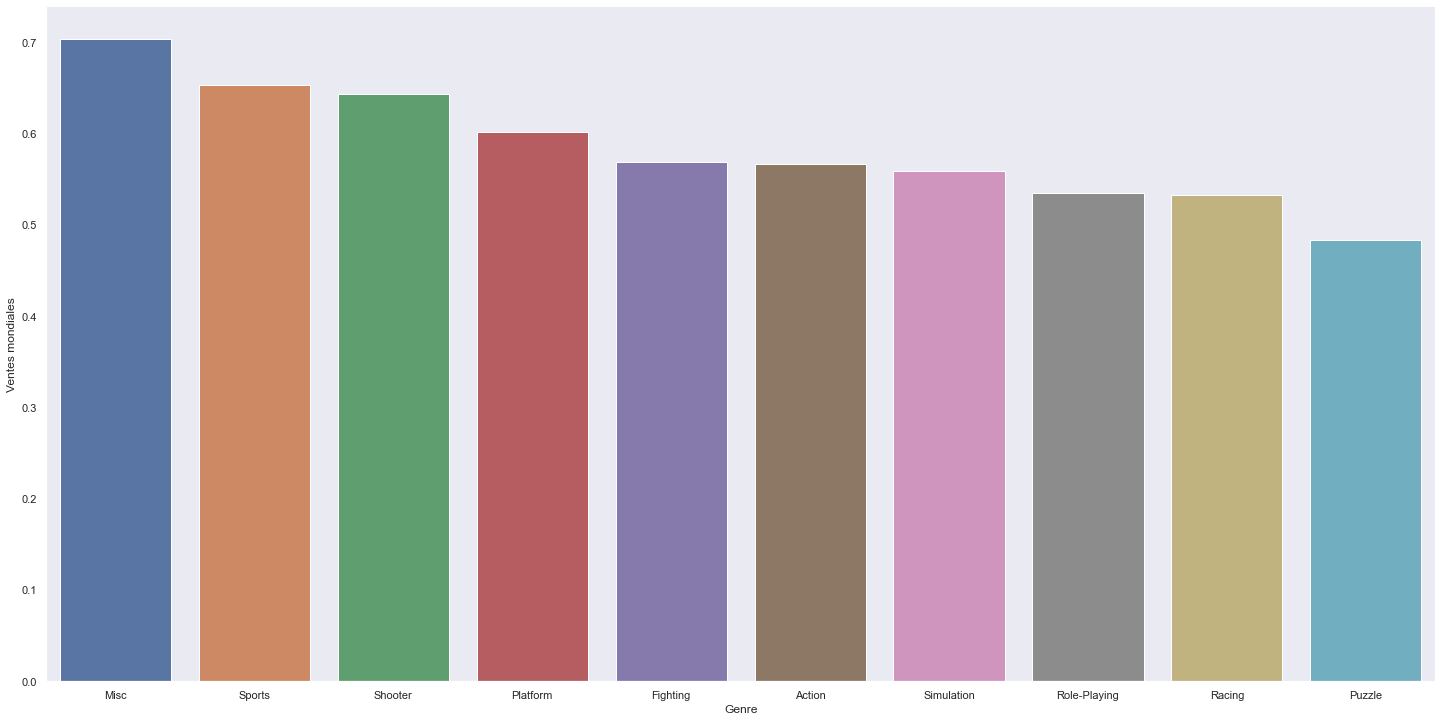

In [83]:
data_3 = df.groupby("Genre").mean().sort_values('Global_Sales', ascending = False).head(10)
sns.catplot(x = data_3.index, y = "Global_Sales", data = data_3, kind = 'bar', height = 10, aspect = 2)
plt.xlabel("Genre")
plt.ylabel("Ventes mondiales")

In [84]:
# Convertir les années en valeur numérique
df['Year_of_Release'] = pd.to_numeric(df['Year_of_Release'], downcast='integer')
df['User_Score'] = df['User_Score'].astype(float)
data_4 = df.groupby("Year_of_Release").mean().sort_values('User_Count', ascending = False)

Text(0, 0.5, 'Ventes mondiales')

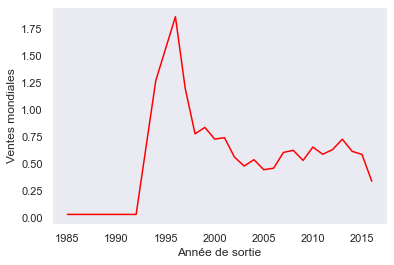

In [85]:
sns.lineplot(x= data_4.index, y='Global_Sales', data= data_4, color= 'red')
plt.xlabel("Année de sortie", fontsize=12)
plt.ylabel("Ventes mondiales", fontsize=12)

Text(-141.41500000000002, 0.5, 'Jeux')

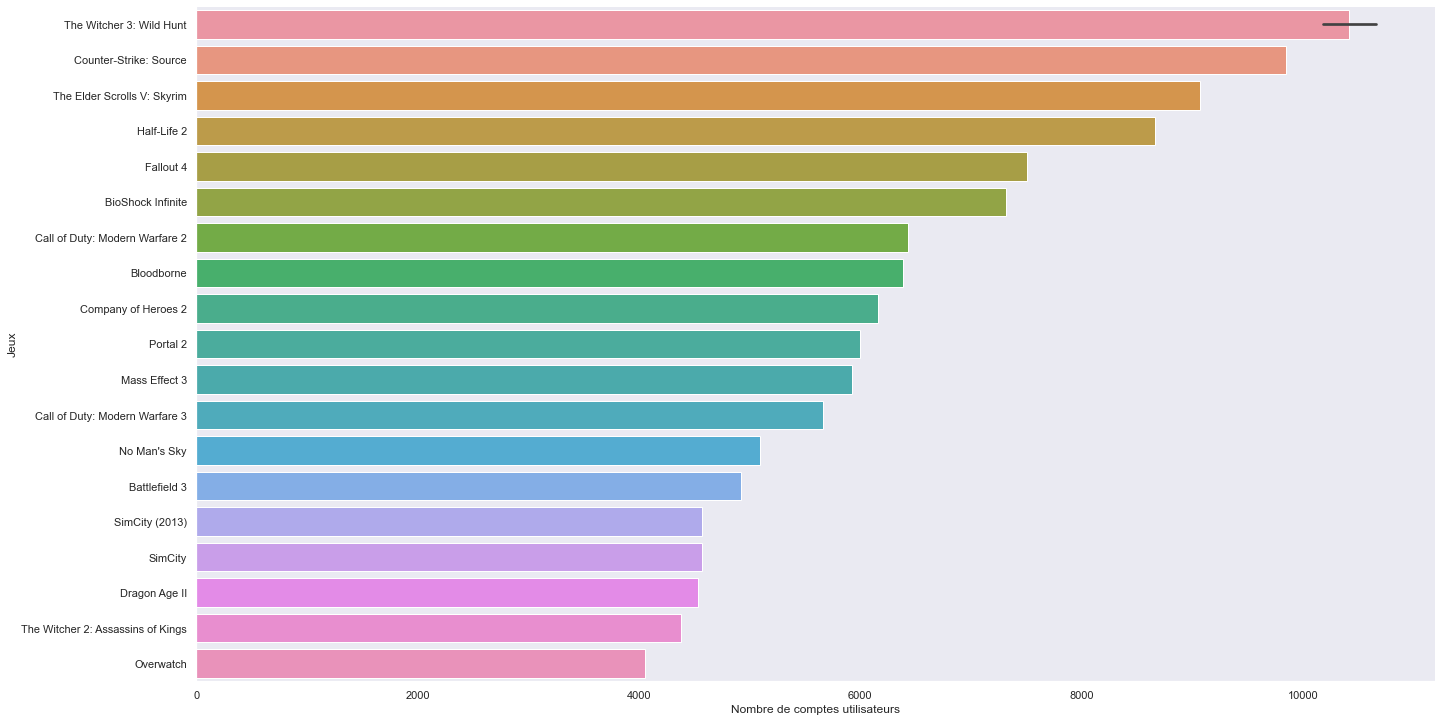

In [87]:
data_7 = df[['Name', 'User_Score', 'User_Count']].sort_values('User_Count', ascending = False).head(20)
sns.catplot(x = "User_Count", y = "Name", data = df.sort_values('User_Count', ascending = False).head(20), kind = 'bar', height = 10, aspect = 2)
plt.xlabel("Nombre de comptes utilisateurs")
plt.ylabel("Jeux")

Text(-141.41500000000002, 0.5, 'Jeux')

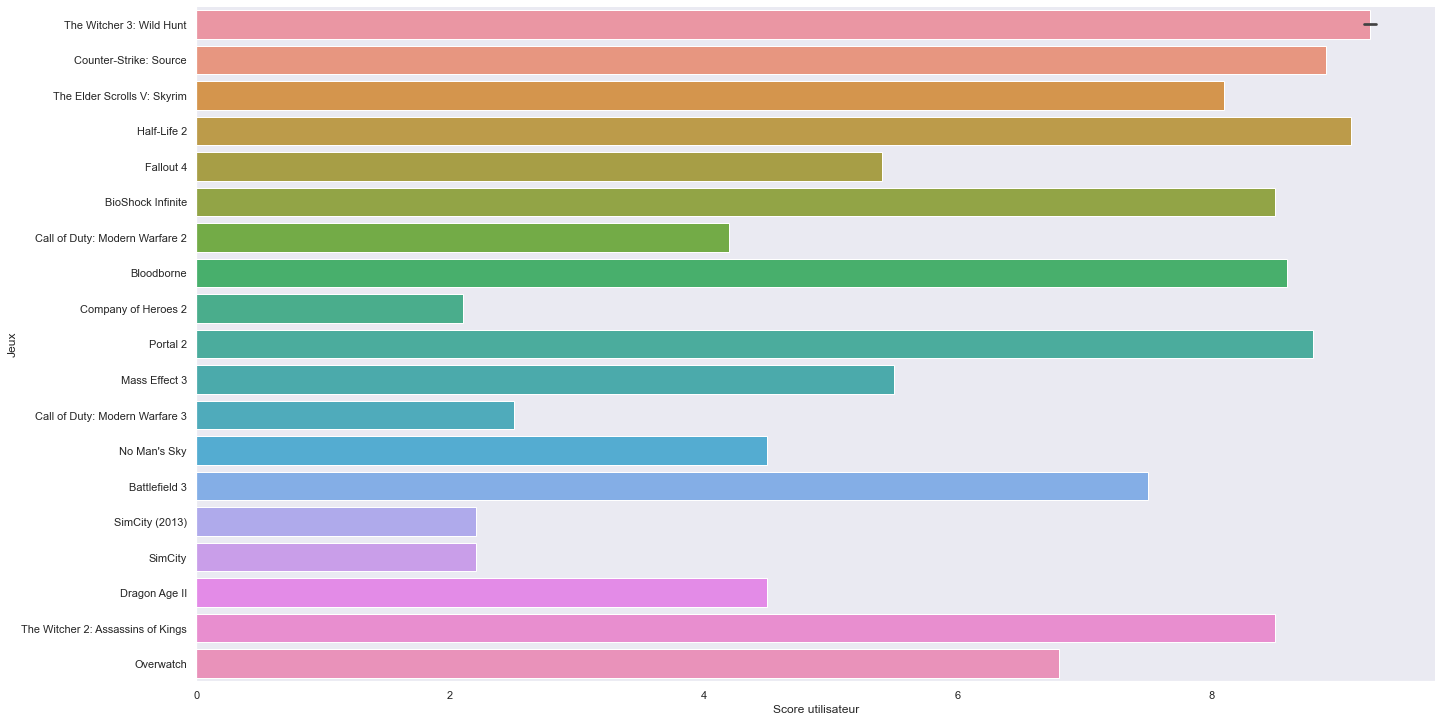

In [88]:
data_5 = df.sort_values('User_Count', ascending = False).head(20)
sns.catplot(x = "User_Score", y = "Name", data = data_5, kind = 'bar', height = 10, aspect = 2)
plt.xlabel("Score utilisateur")
plt.ylabel("Jeux")

<AxesSubplot:xlabel='Genre', ylabel='Platform'>

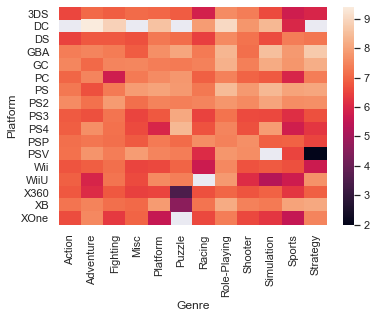

In [89]:
data_6 = df.pivot_table(values='User_Score',index='Platform',columns='Genre')
sns.heatmap(data_6)